In [1]:
from toy_func import StochasticProcessSampler, plot_sampled_trajectories, tMCL,train_tMCL,plot_brownian_bridge, plot_brownien,plot_ARp_quantization
import numpy as np
import matplotlib.pyplot as plt
import torch


The follwing code to test generating samples that will be useful to train the model.

# Brownian Bridge

In [2]:
batch_size = 15000
nb_discretization_points = 500
interval_length = 250  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = tMCL(
    cond_dim=2,  # 1 pour x0 + 1 pour t0
    nb_step_simulation=interval_length,
    n_hypotheses=10,
    device=device,
    loss_type="wta"
)

trained_model = train_tMCL(
    model=model,
    process_type="brownian_bridge",
    num_epochs=50, #250
    batch_size=batch_size,
    nb_discretization_points=nb_discretization_points,
    interval_length=interval_length,
    device=device,
    learning_rate=0.001
) #brownian bridge


Epoch [10/50], Loss: 32.3313
Epoch [20/50], Loss: 14.7564
Epoch [30/50], Loss: 12.7870
Epoch [40/50], Loss: 11.0874
Epoch [50/50], Loss: 10.3499


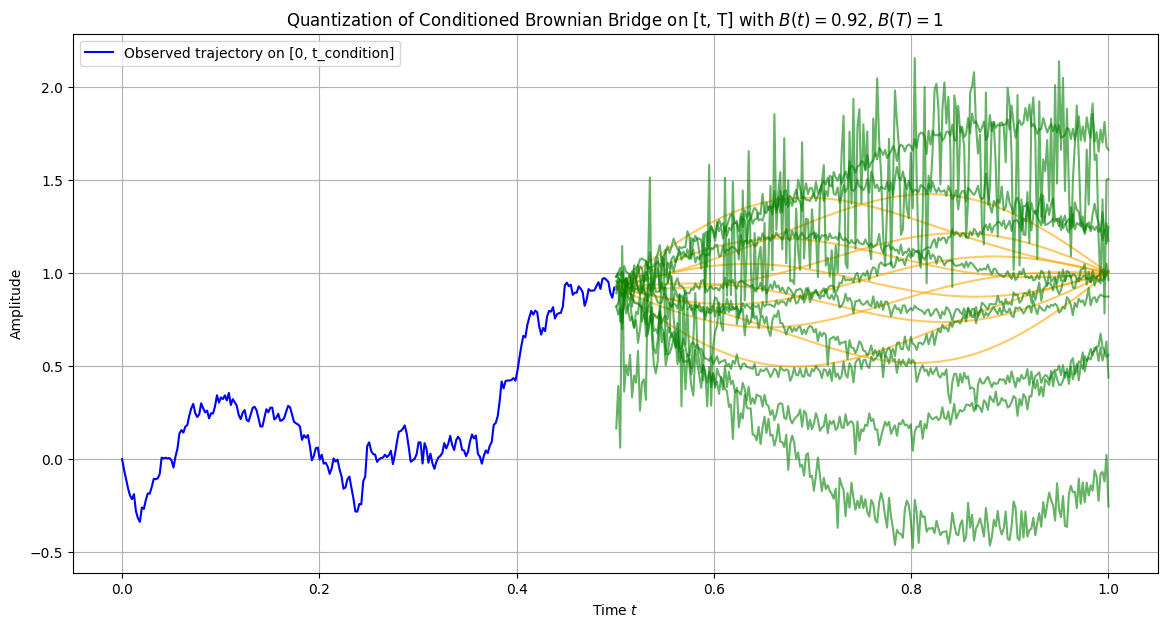

In [9]:
result = plot_brownian_bridge(interval_length=250, nb_discretization_points=500, m=2, N_levels=[5, 2], a=0, b=1, t_condition=0.5, trained_model=trained_model)

# Brownian Motion

In [12]:
batch_size = 1000 #10000
nb_step_simulation = 100
nb_discretization_points = 300
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = tMCL(
    cond_dim=1,
    nb_step_simulation=nb_step_simulation,
    n_hypotheses=10,
    device=device,
    loss_type="relaxted_wta"
)

trained_model = train_tMCL(
    model=model,
    process_type="brownian_motion",
    num_epochs=250,
    batch_size=batch_size,
    nb_discretization_points=nb_discretization_points,
    interval_length=nb_step_simulation,
    device=device,
    learning_rate=0.001
)


Epoch [10/250], Loss: 12.7031
Epoch [20/250], Loss: 6.8029
Epoch [30/250], Loss: 5.8323
Epoch [40/250], Loss: 4.9967
Epoch [50/250], Loss: 4.8733
Epoch [60/250], Loss: 4.6390
Epoch [70/250], Loss: 4.6765
Epoch [80/250], Loss: 4.6406
Epoch [90/250], Loss: 4.4974
Epoch [100/250], Loss: 4.6597
Epoch [110/250], Loss: 4.4976
Epoch [120/250], Loss: 4.3764
Epoch [130/250], Loss: 4.9053
Epoch [140/250], Loss: 4.7687
Epoch [150/250], Loss: 4.6721
Epoch [160/250], Loss: 4.7811
Epoch [170/250], Loss: 4.6639
Epoch [180/250], Loss: 4.5728
Epoch [190/250], Loss: 4.9657
Epoch [200/250], Loss: 4.4921
Epoch [210/250], Loss: 4.6433
Epoch [220/250], Loss: 4.7990
Epoch [230/250], Loss: 5.0126
Epoch [240/250], Loss: 4.8638
Epoch [250/250], Loss: 4.6494


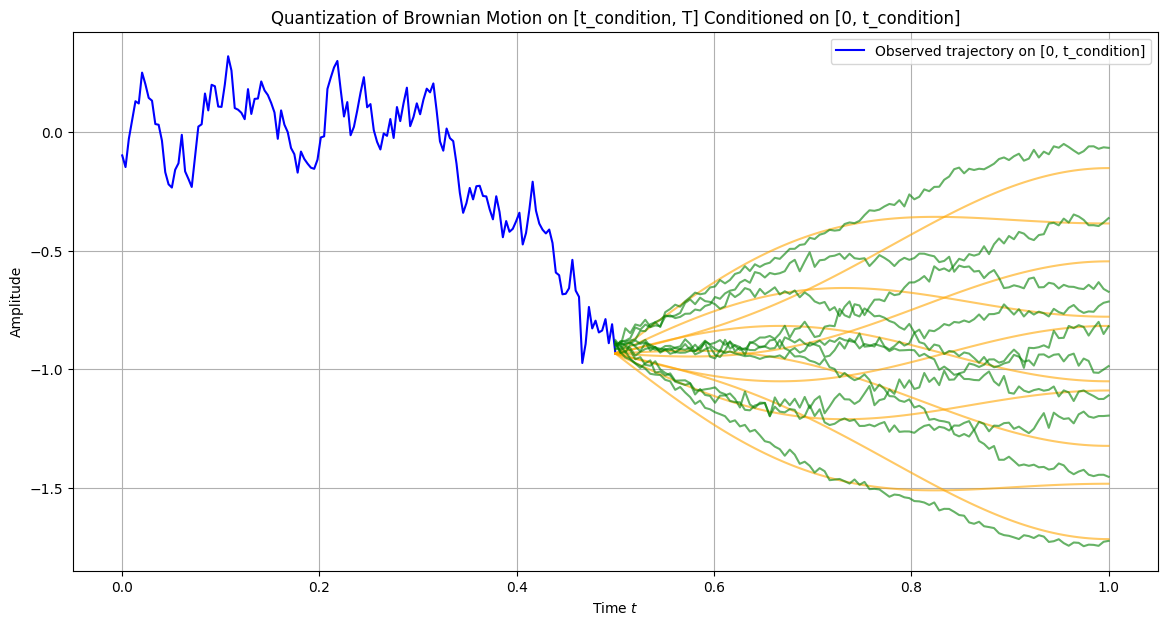

In [14]:
T = 1.0  # Intervalle de temps [0, T]
t_condition = 0.5  # Point où la trajectoire est connue
pred_length = 100 # Longueur de la prédiction
num_steps = 300  # Nombre de points dans l'intervalle total
m = 2  # Nombre de dimensions utilisées (troncature)
N_levels = [5, 2]  # Niveaux de quantification pour chaque dimension

# Assurez-vous que `trained_model` est défini avant d'exécuter cet appel
result = plot_brownien(T, t_condition, pred_length, num_steps, m, N_levels, trained_model)


# AR(5) process 

In [ ]:
p = 5
batch_size = 5000
nb_step_simulation = 100 - p
nb_discretization_points = 300
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = tMCL(
    cond_dim=p,
    nb_step_simulation=nb_step_simulation - p,
    n_hypotheses=10,
    device=device,
    loss_type="wta"
)

trained_model = train_tMCL(
    model=model,
    process_type="ARp",
    num_epochs=200, 
    batch_size=batch_size,
    nb_discretization_points=nb_discretization_points,
    interval_length=nb_step_simulation,
    device=device,
    learning_rate=0.001,
    additional_params={
        "p": p,
        "coefficients": [0.4, 0.2, 0.2, 0.1, 0.1],
        "sigma": np.sqrt(1 / nb_discretization_points)
    }
)


all is working above

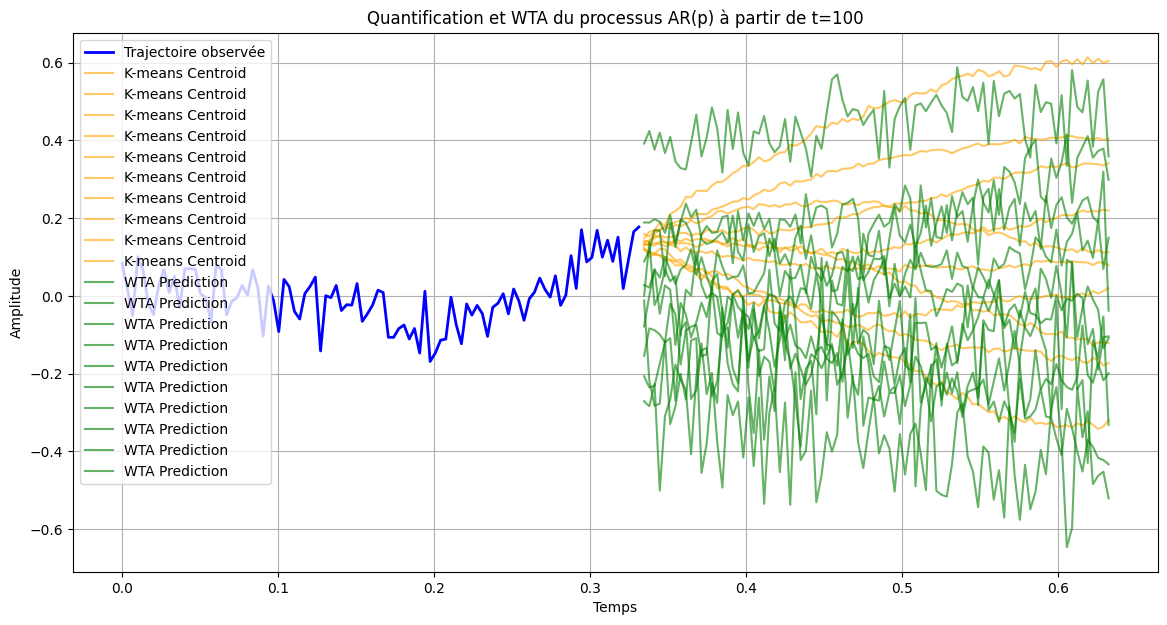

In [3]:
p = 5
batch_size = 5000
nb_step_simulation = 100 - p
nb_discretization_points = 300
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
coefficients = [0.4, 0.2, 0.2, 0.1, 0.1]
sigma = np.sqrt(1 / nb_discretization_points)
t_condition = 100

result = plot_ARp_quantization(batch_size, nb_discretization_points, nb_step_simulation, coefficients, sigma, t_condition, trained_model)
